In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from statistics import median
from scipy.stats import shapiro
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from statsmodels.graphics.gofplots import qqplot

import skimage
from skimage import io
from skimage import viewer
from skimage.measure import label, regionprops

In [31]:
seg = io.imread("Img/Segmentation_4_r=6,5.tif", plugin ="tifffile")
seg = np.invert(seg)

In [32]:
np.shape(seg)

(60, 1484, 8400)

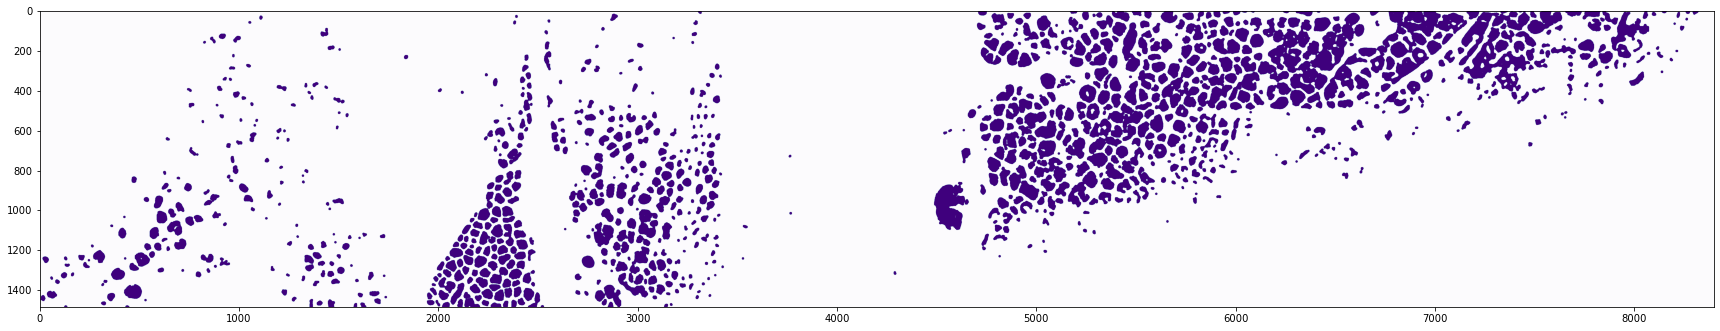

In [54]:
plt.figure(figsize=(30,10))
plt.imshow(seg[30,:,:], cmap = "Purples")
plt.show()

In [46]:
label_seg = label(seg)
regions_seg = regionprops(label_seg)

In [47]:
# Get Properties

n = len(regions_seg)
x_fascia = 970

regions_l = []
regions_r = []

x_c = []
y_c = []
z_c = []

# Splitting the regions into 2 groups, left and right from the fascia. 

for props in regions_seg:

    # Getting the centroids
    
    z0, y0, x0 = props.centroid
    x_c.append(x0)
    y_c.append(y0)
    z_c.append(z0)
    
    cond = x0 < x_fascia
    if (cond):
        regions_l.append(props)
    else:
        regions_r.append(props)
    
areas_l = []
orient_l = []

# Getting the wanted properties from the two groups

for props in regions_l:
    
    # Areas
    a = props.area
    areas_l.append(a)
    
    # Eccentricity
    o = props.moments
    orient_l.append(o)
    
areas_r = []
orient_r = []

for props in regions_r:
    
    # Areas
    a = props.area
    areas_r.append(a)
    
    # Eccentricity
    o = props.moments
    orient_r.append(o)

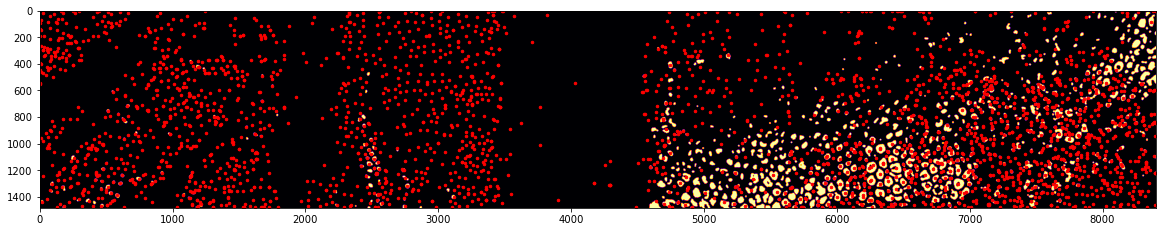

In [53]:
fig, ax = plt.subplots()
fig.set(figheight = 10)
fig.set(figwidth = 20)
ax.imshow(seg[15,:,:], cmap = plt.cm.inferno)

plt.plot(x_c,y_c, '.r', markersize = 5)

plt.show()